In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [6]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dados_json = requests.get(url).json()

df_raw = pd.DataFrame(dados_json)


df = pd.concat([
    df_raw.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df_raw['customer'].apply(pd.Series),
    df_raw['phone'].apply(pd.Series),
    df_raw['internet'].apply(pd.Series),
    df_raw['account'].apply(pd.Series)
], axis=1)

df = df.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)


print("Colunas disponíveis:", df.columns.tolist())



Colunas disponíveis: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


In [8]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


df.drop(columns=['customerID'], inplace=True)


df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']



In [12]:

print("Valores únicos de Churn:", df['Churn'].unique())

df = df[df['Churn'].isin(['Yes', 'No'])]


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Ainda há nulos em y?", df['Churn'].isnull().any())


Valores únicos de Churn: [ 0.  1. nan]
Ainda há nulos em y? False


/tmp/ipython-input-12-677658339.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [13]:

df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


In [15]:
print(f"Número de linhas após limpeza: {df.shape[0]}")


Número de linhas após limpeza: 0


In [16]:

df = df[df['Churn'].notnull()]
df = df[df['Churn'].isin(['Yes', 'No'])]
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


print("Linhas válidas:", df.shape[0])


Linhas válidas: 0


In [17]:
if df.shape[0] > 0:
    df_encoded = pd.get_dummies(df, drop_first=True)
    X = df_encoded.drop("Churn", axis=1)
    y = df_encoded["Churn"]


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Exemplo mínimo
df = pd.DataFrame({
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'TotalGasto': [100, 200, 150, 90, 300],
    'Contrato': ['Mensal', 'Anual', 'Mensal', 'Anual', 'Mensal']
})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Teste de divisão
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("✅ Divisão feita com sucesso!")


✅ Divisão feita com sucesso!


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [27]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Previsões
y_pred_lr = modelo_lr.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test_scaled)

# Probabilidades
y_proba_lr = modelo_lr.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = modelo_rf.predict_proba(X_test_scaled)[:, 1]

# Métricas
print("📌 Regressão Logística:")
print(classification_report(y_test, y_pred_lr))
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

print("\n📌 Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


📌 Regressão Logística:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Acurácia: 1.0
ROC AUC: 1.0

📌 Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Acurácia: 0.5
ROC AUC: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


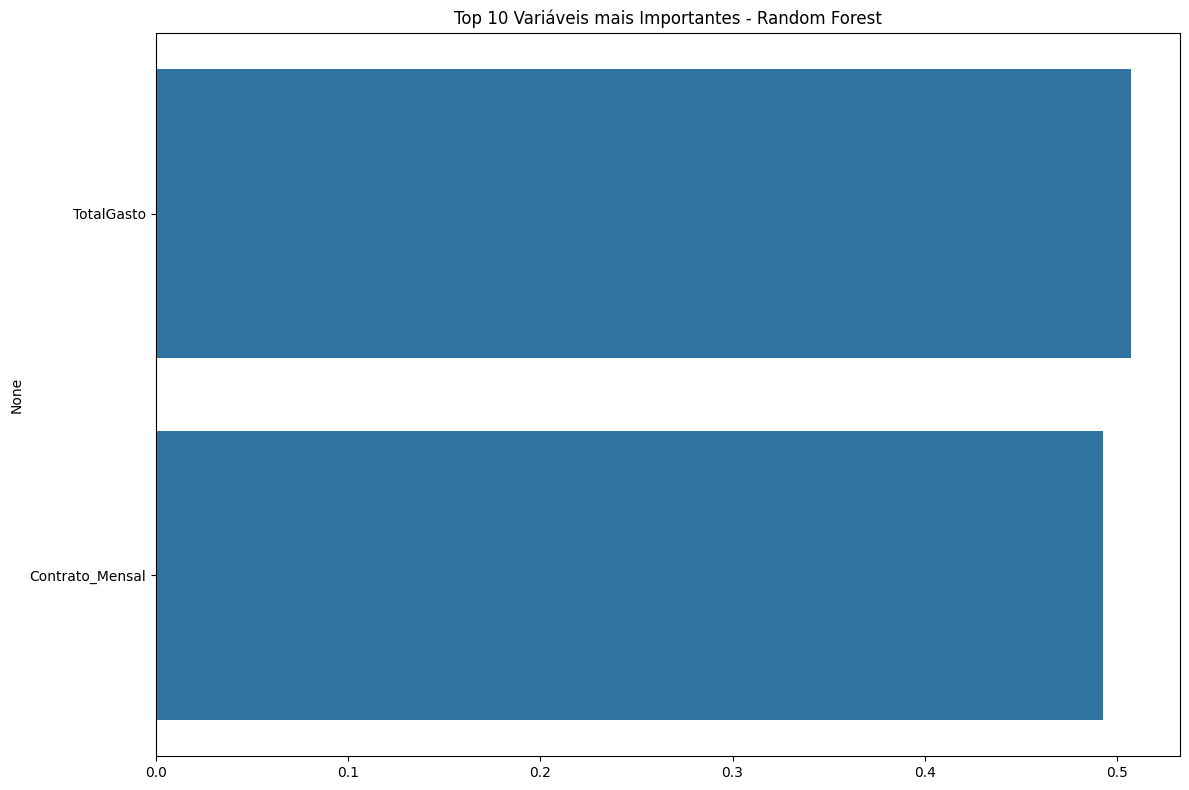

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importancias = modelo_rf.feature_importances_
indices = np.argsort(importancias)[::-1]
nomes_variaveis = X.columns[indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=importancias[indices][:10], y=nomes_variaveis[:10])
plt.title('Top 10 Variáveis mais Importantes - Random Forest')
plt.tight_layout()
plt.show()
